In [20]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
# Define constants here
PATH_TO_DATA: str = "../data/raw/P01/1-02_cut.csv"

# Load Data

In [22]:
def load_data(path: str) -> pd.DataFrame:
    return pd.read_csv(path)


In [23]:
df = load_data(path=PATH_TO_DATA)
df.head(5)

,token,RecID,Condition,EEG-L3,EEG-L5,EEG-C3,EEG-Cz,EEG-C4,EEG-R3,EEG-R5,TS_UNIX,Response
0,tit0Ke,1-02,ECzzz1,4.636520,6.609277,15.824653,30.310553,27.590651,20.413344,9.218625,2022-06-20 16:46:17.507723264+02:00,0.054545
1,tit0Ke,1-02,ECzzz1,4.466598,4.295496,15.962606,30.294660,27.827599,19.385533,9.112784,2022-06-20 16:46:17.507746048+02:00,0.054545
2,tit0Ke,1-02,ECzzz1,4.344451,2.156723,15.469746,27.259741,24.781860,14.724499,7.542250,2022-06-20 16:46:17.507781888+02:00,0.054545
3,tit0Ke,1-02,ECzzz1,4.789382,0.919025,15.156759,22.333284,19.858646,7.874961,5.054528,2022-06-20 16:46:17.507801088+02:00,0.054545
4,tit0Ke,1-02,ECzzz1,6.260908,1.054332,15.756324,17.353406,15.194804,1.304544,2.294735,2022-06-20 16:46:17.507827968+02:00,0.054545


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112667 entries, 0 to 112666
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   token      112667 non-null  object 
 1   RecID      112667 non-null  object 
 2   Condition  112667 non-null  object 
 3   EEG-L3     112667 non-null  float64
 4   EEG-L5     112667 non-null  float64
 5   EEG-C3     112667 non-null  float64
 6   EEG-Cz     112667 non-null  float64
 7   EEG-C4     112667 non-null  float64
 8   EEG-R3     112667 non-null  float64
 9   EEG-R5     112667 non-null  float64
 10  TS_UNIX    112667 non-null  object 
 11  Response   112667 non-null  float64
dtypes: float64(8), object(4)
memory usage: 10.3+ MB


In [25]:
df.describe()

,EEG-L3,EEG-L5,EEG-C3,EEG-Cz,EEG-C4,EEG-R3,EEG-R5,Response
count,112667.000000,112667.000000,112667.000000,112667.000000,112667.000000,112667.000000,112667.000000,112667.000000
mean,-0.023698,-0.032212,-0.026543,-0.032531,-0.025760,-0.025400,-0.031831,0.261834
std,35.035488,33.143787,34.859984,33.549436,36.417668,31.997493,32.439037,0.171826
min,-579.571982,-605.242085,-582.077804,-566.234895,-576.014499,-573.014318,-575.513981,0.045455
25%,-7.402333,-6.785184,-10.712662,-12.405466,-14.466450,-9.467767,-9.054340,0.054545
50%,0.371327,0.462290,-0.456551,0.539692,-1.899373,0.726390,0.210074,0.281818
75%,8.453171,8.038708,10.703064,13.626706,12.805143,10.835823,9.998169,0.445455
max,434.699182,431.668519,518.404910,435.253911,485.136196,442.226769,432.130835,0.518182


# Preprocess

In [26]:
# Convert 'TS_UNIX' to datetime
df["TS_UNIX"] = pd.to_datetime(df["TS_UNIX"], format="%Y-%m-%d %H:%M:%S.%f")
df.head(5)

,token,RecID,Condition,EEG-L3,EEG-L5,EEG-C3,EEG-Cz,EEG-C4,EEG-R3,EEG-R5,TS_UNIX,Response
0,tit0Ke,1-02,ECzzz1,4.636520,6.609277,15.824653,30.310553,27.590651,20.413344,9.218625,2022-06-20 16:46:17.507723264+02:00,0.054545
1,tit0Ke,1-02,ECzzz1,4.466598,4.295496,15.962606,30.294660,27.827599,19.385533,9.112784,2022-06-20 16:46:17.507746048+02:00,0.054545
2,tit0Ke,1-02,ECzzz1,4.344451,2.156723,15.469746,27.259741,24.781860,14.724499,7.542250,2022-06-20 16:46:17.507781888+02:00,0.054545
3,tit0Ke,1-02,ECzzz1,4.789382,0.919025,15.156759,22.333284,19.858646,7.874961,5.054528,2022-06-20 16:46:17.507801088+02:00,0.054545
4,tit0Ke,1-02,ECzzz1,6.260908,1.054332,15.756324,17.353406,15.194804,1.304544,2.294735,2022-06-20 16:46:17.507827968+02:00,0.054545


# Visualize

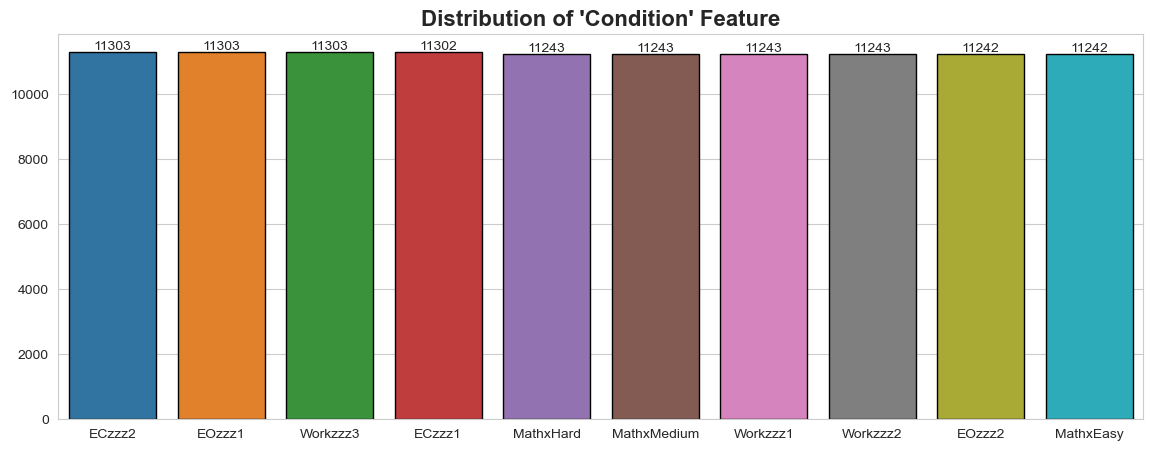

In [27]:
def plot_distribution(df: pd.DataFrame, col_name: str = "Condition") -> None:
    """ Plots the distribution of the feature specified by input param 'col_name' (e.g. "Condition")

    :param df: DataFrame
    :param col_name: str -- Name of the feature
    :return: None
    """
    assert col_name in df.columns, f"Error: '{col_name}' not in df!"
    # Get frequency
    dist = df[col_name].value_counts()

    # Plot settings
    plt.figure(figsize=(14, 5))
    plt.title(f"Distribution of '{col_name}' Feature", size=16, fontweight="bold")
    g = sns.barplot(x=dist.keys(), y=dist.values, edgecolor="black")
    g.bar_label(g.containers[0])
    plt.show()

plot_distribution(df=df, col_name="Condition")

## Plot Time Series

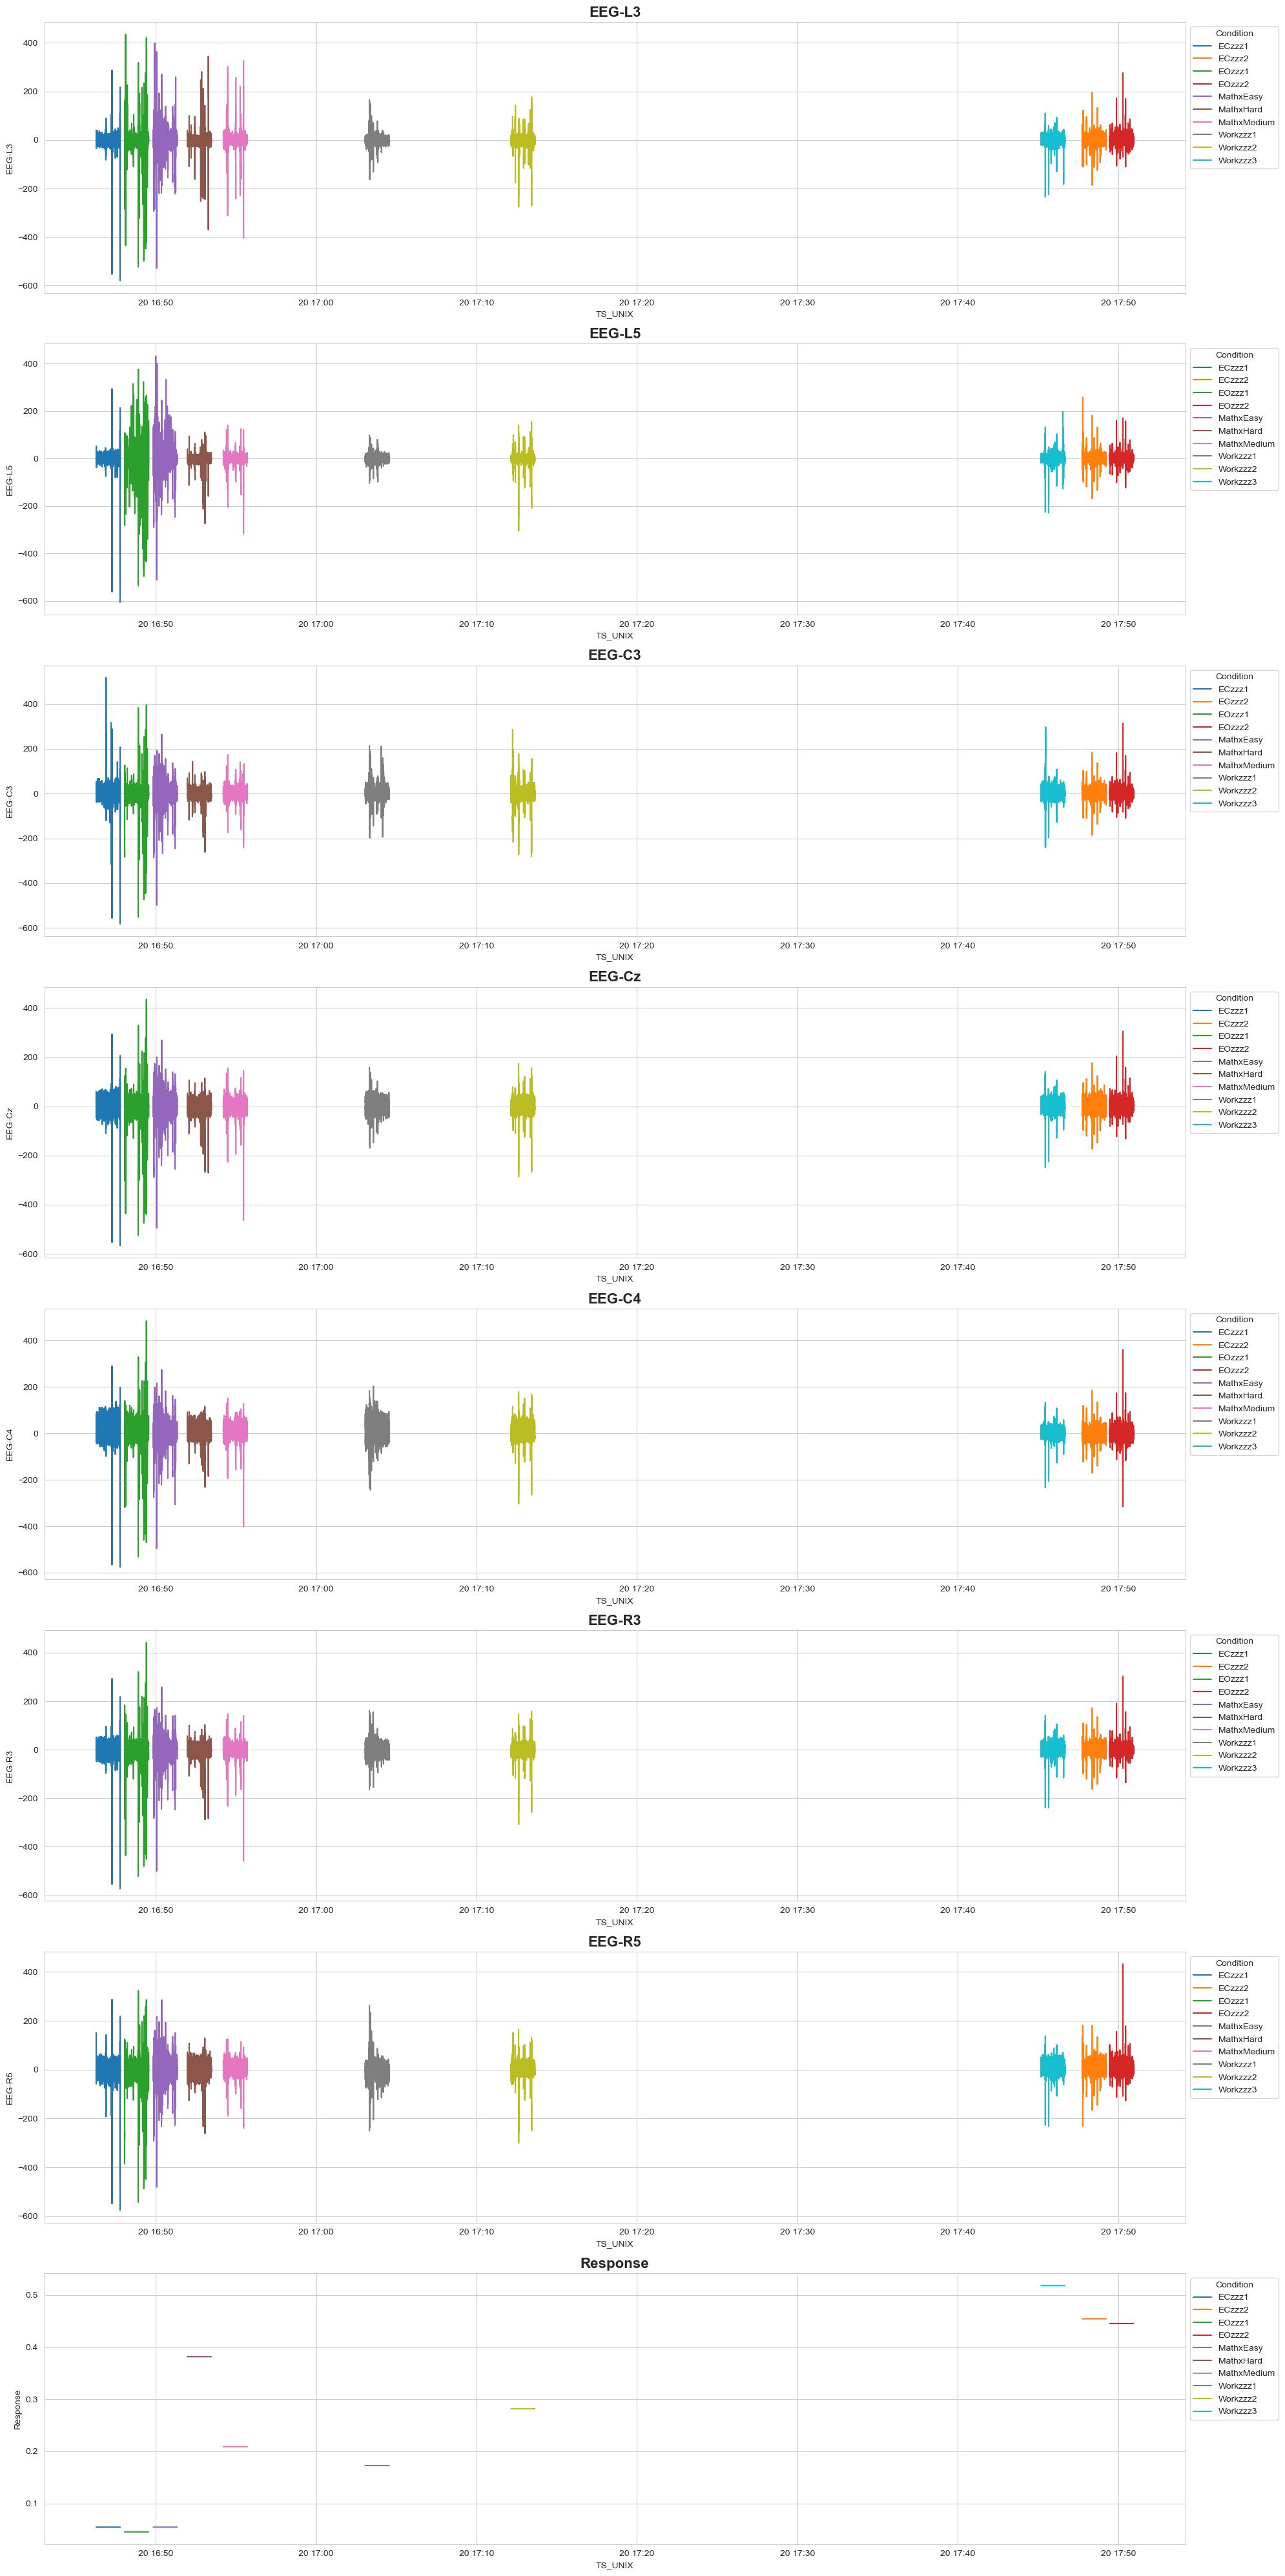

In [28]:
def plot_all_time_series(df: pd.DataFrame, time_col: str = "TS_UNIX") -> None:
    """ Plots all Time Series (all float64 columns) in the provided DataFrame

    :param df: pd.DataFrame -- Input DataFrame
    :param time_col: str -- Name of the time column
    :return: None
    """
    cols = list(df.select_dtypes(include=float).columns)

    fig, axes = plt.subplots(nrows=len(cols), ncols=1, figsize=(20, len(cols)*5))
    for col, ax in zip(cols, axes.flatten()):
        sns.lineplot(data=df, x=time_col, y=col, ax=ax, hue="Condition")
        ax.set_title(f"{col}", fontweight="bold", size=16)
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    fig.tight_layout()


plot_all_time_series(df)